In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [4]:
# csv 불러오기
train = pd.read_csv('trim_train_data.csv')

In [5]:
train.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,127.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,73.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,Normal


In [6]:
# 출력값 잘리지 않게
pd.set_option('display.max_rows', None)

In [8]:
# info 잘리지 않게 출력
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 464 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    Wip Line_Dam                                                object 
 1    Process Desc._Dam                                           object 
 2    Equipment_Dam                                               object 
 3    Model.Suffix_Dam                                            object 
 4    Workorder_Dam                                               object 
 5    Insp. Seq No._Dam                                           int64  
 6    Insp Judge Code_Dam                                         object 
 7    CURE END POSITION X Collect Result_Dam                      float64
 8    CURE END POSITION X Unit Time_Dam                           float64
 9    CURE END POSITION X Judge Value_Dam                         float64
 1

In [9]:
# null값 확인
train.isnull().sum()

Wip Line_Dam                                                      0
Process Desc._Dam                                                 0
Equipment_Dam                                                     0
Model.Suffix_Dam                                                  0
Workorder_Dam                                                     0
Insp. Seq No._Dam                                                 0
Insp Judge Code_Dam                                               0
CURE END POSITION X Collect Result_Dam                            0
CURE END POSITION X Unit Time_Dam                             40506
CURE END POSITION X Judge Value_Dam                           40506
CURE END POSITION Z Collect Result_Dam                            0
CURE END POSITION Z Unit Time_Dam                             40506
CURE END POSITION Z Judge Value_Dam                           40506
CURE END POSITION Θ Collect Result_Dam                            0
CURE END POSITION Θ Unit Time_Dam               

In [10]:
# 출력 원래대로
pd.reset_option('display.max_rows')

In [13]:
col_names = list(train.columns)
col_names

['Wip Line_Dam',
 'Process Desc._Dam',
 'Equipment_Dam',
 'Model.Suffix_Dam',
 'Workorder_Dam',
 'Insp. Seq No._Dam',
 'Insp Judge Code_Dam',
 'CURE END POSITION X Collect Result_Dam',
 'CURE END POSITION X Unit Time_Dam',
 'CURE END POSITION X Judge Value_Dam',
 'CURE END POSITION Z Collect Result_Dam',
 'CURE END POSITION Z Unit Time_Dam',
 'CURE END POSITION Z Judge Value_Dam',
 'CURE END POSITION Θ Collect Result_Dam',
 'CURE END POSITION Θ Unit Time_Dam',
 'CURE END POSITION Θ Judge Value_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE SPEED Unit Time_Dam',
 'CURE SPEED Judge Value_Dam',
 'CURE STANDBY POSITION X Collect Result_Dam',
 'CURE STANDBY POSITION X Unit Time_Dam',
 'CURE STANDBY POSITION X Judge Value_Dam',
 'CURE STANDBY POSITION Z Collect Result_Dam',
 'CURE STANDBY POSITION Z Unit Time_Dam',
 'CURE STANDBY POSITION Z Judge Value_Dam',
 'CURE STANDBY POSITION Θ Collect Result_Dam',
 'CURE STANDBY POSITION Θ Unit Time_Dam',
 'CURE STANDBY POSITION Θ Judge Value_Dam',
 '

In [14]:
# 고윳값 확인
for col in col_names:
    cnt = train[col].value_counts()
    print(f"{cnt}\n")

Wip Line_Dam
IVI-OB6    40506
Name: count, dtype: int64

Process Desc._Dam
Dam Dispenser    40506
Name: count, dtype: int64

Equipment_Dam
Dam dispenser #1    25030
Dam dispenser #2    15476
Name: count, dtype: int64

Model.Suffix_Dam
AJX75334501    33820
AJX75334502     3390
AJX75334505     2635
AJX75334507      310
AJX75334503      162
AJX75334506      129
AJX75334508       60
Name: count, dtype: int64

Workorder_Dam
3L1X8574-2       272
3K1XC268-1       227
3L1X9934-1       217
3L1X8506-1       217
3K1XA586-2       189
                ... 
4BPM0084-1         2
3FPXX064-0003      2
3H1XB714-1         1
4CPM0166-1         1
3HPM0061-1         1
Name: count, Length: 663, dtype: int64

Insp. Seq No._Dam
1    40506
Name: count, dtype: int64

Insp Judge Code_Dam
OK    40506
Name: count, dtype: int64

CURE END POSITION X Collect Result_Dam
240.0     25030
1000.0    15476
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

CURE END POSITI

**fill2**
고윳값 1개인 컬럼: wip line, process, Insp. Seq No, Insp Judge Code, discharged time, dispense volume, WorkMode

In [15]:
### 한글 및 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' #한글
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호

#### model suffix에 따른 타깃값

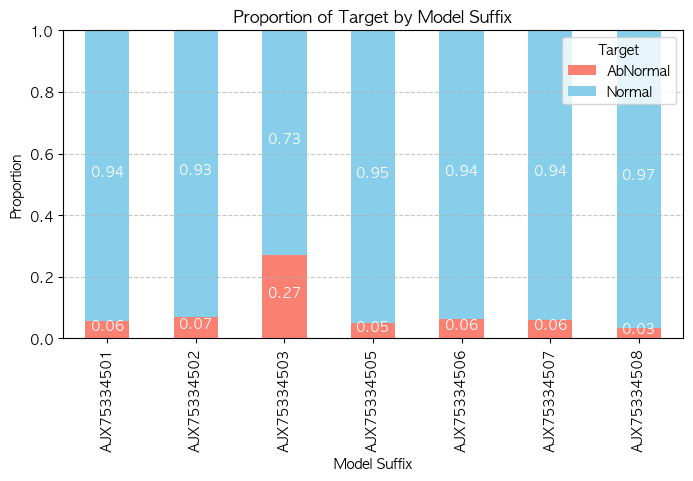

In [67]:
### model suffix에 따른 타깃값

# model suffix와 target 값에 따른 비율 계산
count_df = train.groupby(['Model.Suffix_Fill2', 'target']).size().unstack(fill_value=0)

# 각 model suffix에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))

plt.xlabel('Model Suffix')
plt.ylabel('Proportion')
plt.title('Proportion of Target by Model Suffix')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

#### workorder에 따른 타깃값

In [21]:
train['cleaned_workorder'] = train['Workorder_Fill2'].str.split('-').str[0]

pd.set_option('display.max_rows', None)
train['cleaned_workorder'].value_counts()

cleaned_workorder
4A1XB542    298
3L1X8574    272
3K1XC268    256
3K1XA586    238
3M1XH422    227
3L1X9934    217
3L1X8506    217
3K1X8037    183
3M1XH425    182
4B1X9671    179
3F1X9648    178
3L1XA258    178
4B1XA871    176
3K1X0791    176
3J1XB576    176
3L1XA128    175
4A1XB541    175
3L1XB735    174
4B1X9674    171
3G1XC632    171
3I1XA254    171
3G1X8293    171
3F1XA350    170
3L1X1371    170
3L1X9930    170
3L1X9204    170
3M1XH430    170
4A1XB814    170
3L1XB244    170
3K1X1645    170
3L1XB031    169
3M1XH389    168
3G1X8298    167
3L1XB245    167
3L1XA256    167
3G1XB177    167
3K1X0056    167
3J1XC129    166
3J1X8954    165
3G1X4501    165
3G1X8647    164
3H1XE355    164
3M1XH387    164
3K1X7331    164
3J1XE079    163
3K1X1646    161
3G1XB948    161
3J1XD005    160
3M1XH388    160
3L1XB019    159
3G1XA502    159
3H1X3340    159
3J1XF433    158
3F1X9644    157
3K1XC304    157
3G1X9014    157
4A1XB815    156
3H1X7979    155
4B1X6364    155
3F1XB560    153
3G1XC496    152
3L1XA9

In [25]:
train['workorder_prefix'] = train['Workorder_Fill2'].str[:4]
train['workorder_prefix'].value_counts()

workorder_prefix
3G1X    4608
3M1X    4586
3J1X    4057
4A1X    3962
3L1X    3665
3H1X    3322
3K1X    3176
4B1X    2855
4E1X    2696
3I1X    2227
4C1X    2103
3F1X    1276
4F1X     960
3LPM     153
4BPM     139
3KPM     123
3HPX     109
3JPX     100
3MPX      78
4BPX      68
3HPM      63
4CPM      53
4EPM      46
3FPM      24
3GPM      23
4APX      13
3KPX      11
4CPX       8
3FPX       2
Name: count, dtype: int64

In [57]:
pd.reset_option('display.max_rows')

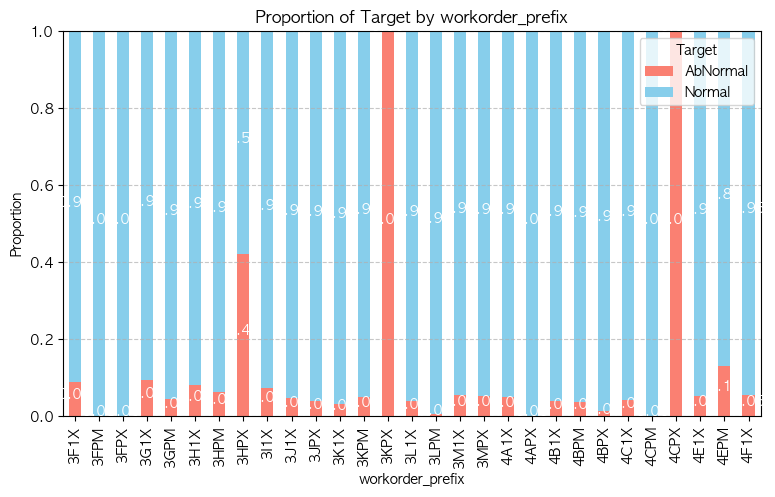

In [68]:
### workorder에 따른 타깃값

# workorder와 target 값에 따른 비율 계산
count_df = train.groupby(['workorder_prefix', 'target']).size().unstack(fill_value=0)

# 각 workorder에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(9, 5))

plt.xlabel('workorder_prefix')
plt.ylabel('Proportion')
plt.title('Proportion of Target by workorder_prefix')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

#### PalletID에 따른 타깃값

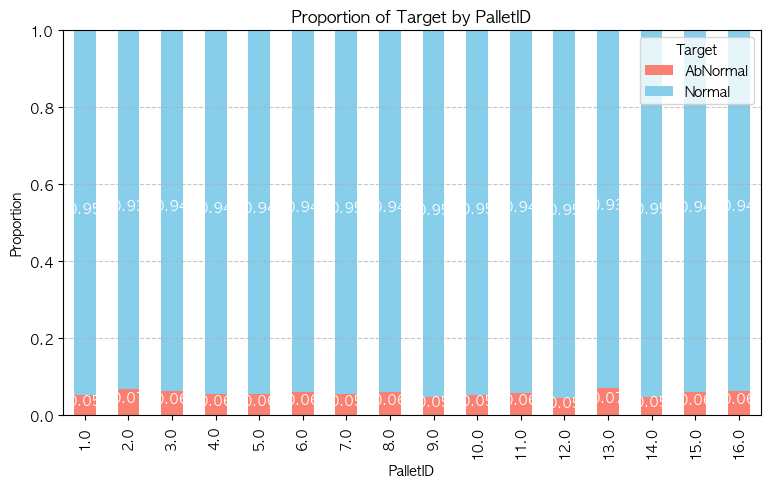

In [79]:
### PalletID에 따른 타깃값

# PalletID와 target 값에 따른 비율 계산
count_df = train.groupby(['PalletID Collect Result_Fill2', 'target']).size().unstack(fill_value=0)

# 각 PalletID에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(9, 5))

plt.xlabel('PalletID')
plt.ylabel('Proportion')
plt.title('Proportion of Target by PalletID')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

#### Receip No에 따른 타깃값

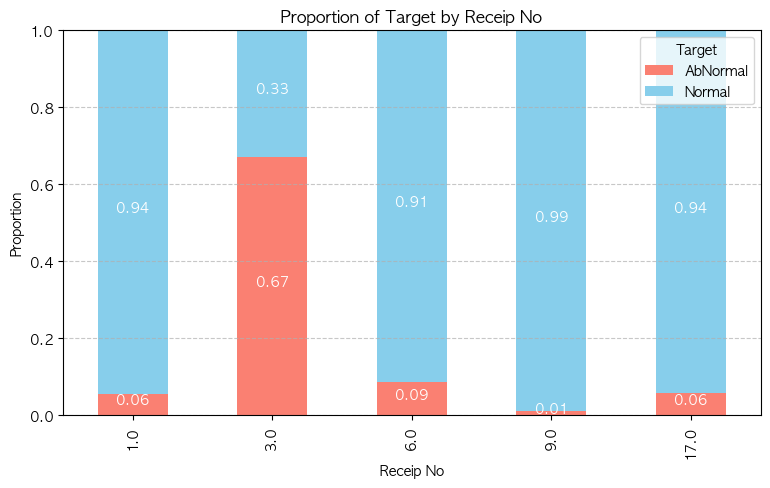

In [80]:
### Receip No에 따른 타깃값

# PalletID와 target 값에 따른 비율 계산
count_df = train.groupby(['Receip No Collect Result_Fill2', 'target']).size().unstack(fill_value=0)

# 각 Receip No에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(9, 5))

plt.xlabel('Receip No')
plt.ylabel('Proportion')
plt.title('Proportion of Target by Receip No')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

#### 구분 간 조합

In [88]:
# workorder_prefix와 receip no 피벗 테이블
pivot_df = train.pivot_table(index='workorder_prefix', columns='Receip No Collect Result_Fill2', aggfunc='size', fill_value=0)
print(pivot_df)

Receip No Collect Result_Fill2  1.0   3.0   6.0   9.0   17.0
workorder_prefix                                            
3F1X                            1276     0     0     0     0
3FPM                              24     0     0     0     0
3FPX                               2     0     0     0     0
3G1X                            4608     0     0     0     0
3GPM                              23     0     0     0     0
3H1X                            3322     0     0     0     0
3HPM                              63     0     0     0     0
3HPX                              21    64     0    24     0
3I1X                            2227     0     0     0     0
3J1X                            4057     0     0     0     0
3JPX                             100     0     0     0     0
3K1X                            3176     0     0     0     0
3KPM                             123     0     0     0     0
3KPX                              11     0     0     0     0
3L1X                    

In [87]:
# model.suffix와 receip no 피벗 테이블
pivot_df = train.pivot_table(index='Model.Suffix_Fill2', columns='Receip No Collect Result_Fill2', aggfunc='size', fill_value=0)
print(pivot_df)

Receip No Collect Result_Fill2   1.0   3.0   6.0   9.0   17.0
Model.Suffix_Fill2                                           
AJX75334501                     33792     0     5     0    23
AJX75334502                      2426     0   964     0     0
AJX75334503                         2    64     0    96     0
AJX75334505                      2572     0     0     0    63
AJX75334506                       115     0    14     0     0
AJX75334507                       310     0     0     0     0
AJX75334508                        60     0     0     0     0


In [90]:
# 새로운 컬럼 생성: Receip No와 Model.Suffix의 조합
train['model_receip_combined'] = train['Model.Suffix_Fill2'] + '_' + train['Receip No Collect Result_Fill2'].astype(str)

-> 같은 4503인데 3.0인 경우 abnormal 비율이 높고, 9.0일 경우 normal 비율이 높아 구분해보기 위해 model.suffix와 receip no 합쳐서 새로운 컬럼 생성

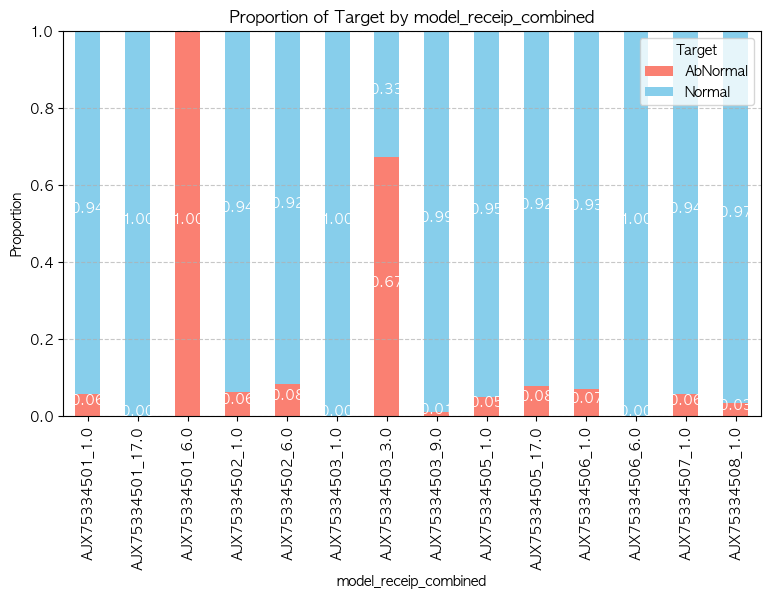

In [91]:
### model_receip_combined에 따른 타깃값

# model_receip_combined와 target 값에 따른 비율 계산
count_df = train.groupby(['model_receip_combined', 'target']).size().unstack(fill_value=0)

# 각 model_receip_combined에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(9, 5))

plt.xlabel('model_receip_combined')
plt.ylabel('Proportion')
plt.title('Proportion of Target by model_receip_combined')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

In [93]:
# 새로운 컬럼 생성: Receip No와 Model.Suffix의 조합 -> 3.0과 9.0의 경우에만
train['39_model_receip_combined'] = train.apply(
    lambda row: f"{row['Model.Suffix_Fill2']}_{row['Receip No Collect Result_Fill2']}" 
    if row['Receip No Collect Result_Fill2'] in [3.0, 9.0] else row['Model.Suffix_Fill2'],
    axis=1
)

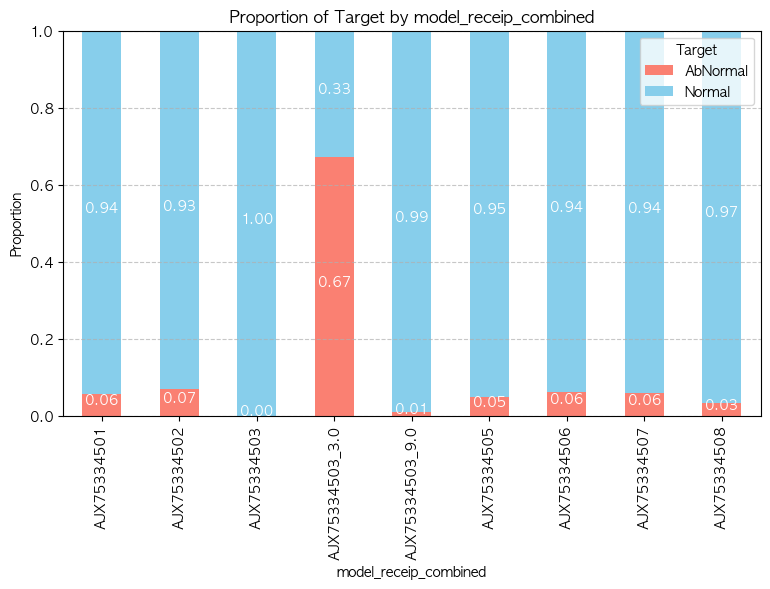

In [96]:
### model_receip_combined에 따른 타깃값

# model_receip_combined와 target 값에 따른 비율 계산
count_df = train.groupby(['39_model_receip_combined', 'target']).size().unstack(fill_value=0)

# 각 model_receip_combined에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(9, 5))

plt.xlabel('model_receip_combined')
plt.ylabel('Proportion')
plt.title('Proportion of Target by model_receip_combined')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

In [97]:
# 새로운 컬럼 생성: Receip No와 workorder_prefix의 조합 -> 3.0과 9.0의 경우에만
train['workorder_receip_combined'] = train.apply(
    lambda row: f"{row['workorder_prefix']}_{row['Receip No Collect Result_Fill2']}" 
    if row['Receip No Collect Result_Fill2'] in [3.0, 9.0] else row['workorder_prefix'],
    axis=1
)

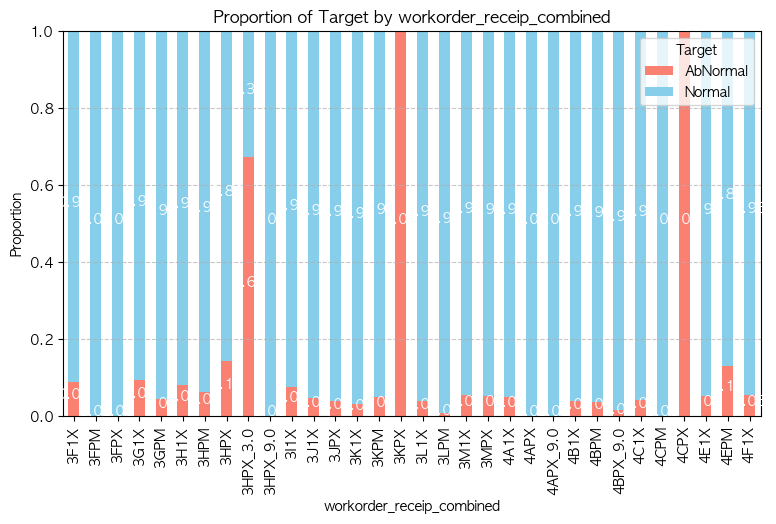

In [98]:
### workorder_receip_combined에 따른 타깃값

# workorder_receip_combined와 target 값에 따른 비율 계산
count_df = train.groupby(['workorder_receip_combined', 'target']).size().unstack(fill_value=0)

# 각 workorder_receip_combined에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(9, 5))

plt.xlabel('workorder_receip_combined')
plt.ylabel('Proportion')
plt.title('Proportion of Target by workorder_receip_combined')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

#### 레진도포 stage 1-3 좌표 시각화

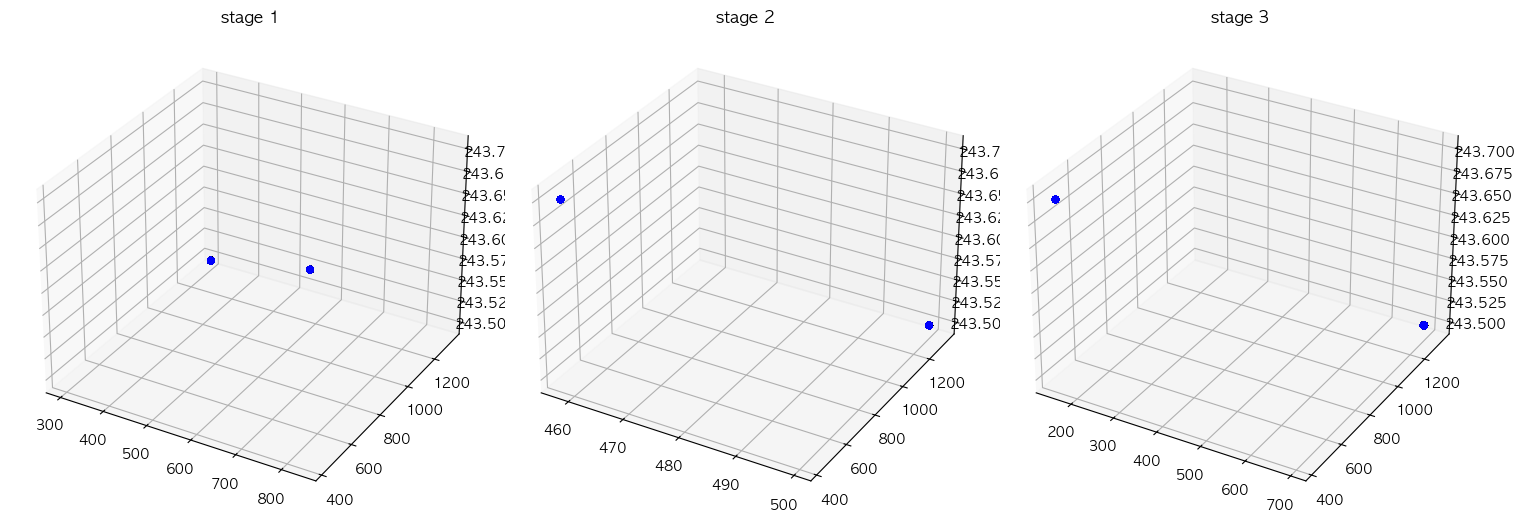

In [30]:
### 레진도포 노즐의 위치에 따른 타깃값 시각화

# 각 stage에 대한 3D Figure 생성
fig = plt.figure(figsize=(15, 10))

# 타깃값 색상 지정
color_map = {'AbNormal': 'red', 'Normal': 'blue'}
train['color'] = train['target'].map(color_map)

colors = train['color']

## stage 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(train['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'], 
            train['HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2'], 
            train['HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2'], 
            c=colors, alpha=0.5)
ax1.set_title('stage 1')

## stage 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(train['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2'], 
            train['HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2'], 
            train['HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2'], 
            c=colors, alpha=0.5)
ax2.set_title('stage 2')

## stage 3
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(train['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2'], 
            train['HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2'], 
            train['HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2'], 
            c=colors, alpha=0.5)
ax3.set_title('stage 3')

# 그래프 표시
plt.tight_layout()
plt.show()

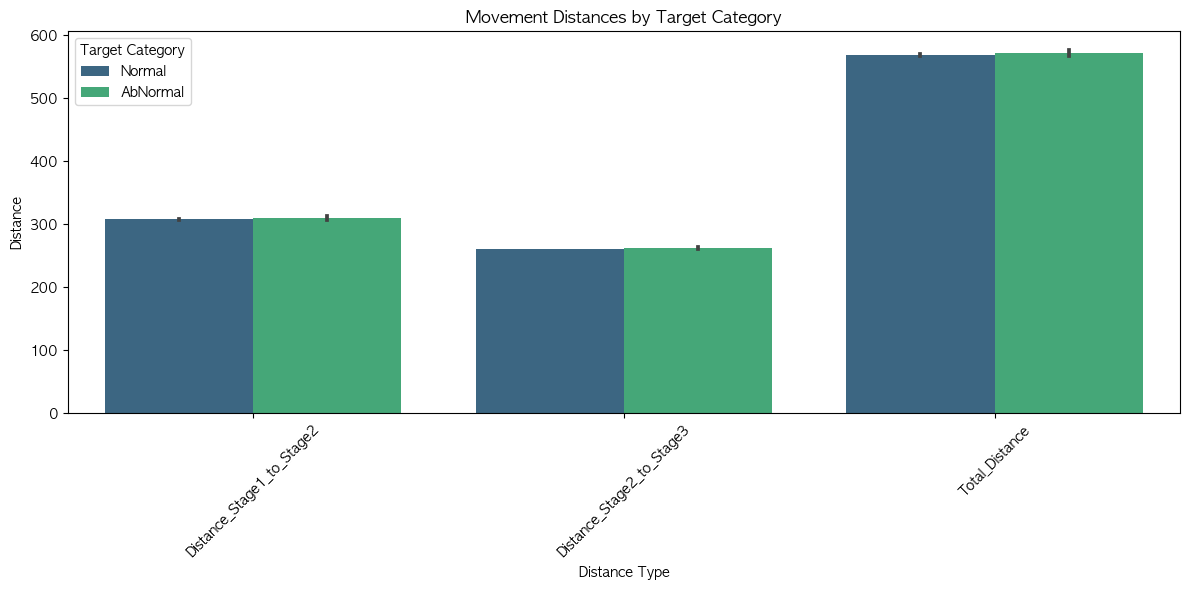

In [104]:
# 이동 거리 계산
train['Distance_Stage1_to_Stage2'] = abs(train['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2'] - train['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'])
train['Distance_Stage2_to_Stage3'] = abs(train['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2'] - train['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2'])
train['Total_Distance'] = abs(train['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2'] - train['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'])

# 데이터 변형
melted_train = train.melt(id_vars=['target'], value_vars=['Distance_Stage1_to_Stage2', 'Distance_Stage2_to_Stage3', 'Total_Distance'],
                           var_name='Distance_Type', value_name='Distance')

# 시각화
plt.figure(figsize=(12, 6))

# 바 차트 (모든 거리)
sns.barplot(data=melted_train, x='Distance_Type', y='Distance', hue='target', palette='viridis')

# 그래프 꾸미기
plt.title('Movement Distances by Target Category')
plt.xlabel('Distance Type')
plt.ylabel('Distance')
plt.legend(title='Target Category')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

#### cure speed 비교 (UV 경화 속도)

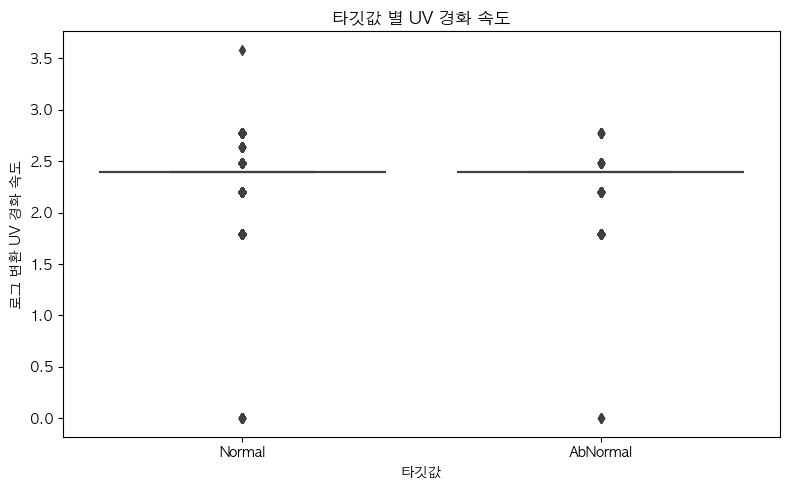

In [35]:
### 타깃값 별 UV 경화 속도

# 속도 데이터에 로그 변환 적용
train['log_cure_speed'] = np.log(train['CURE SPEED Collect Result_Fill2'] - train['CURE SPEED Collect Result_Fill2'].min() + 1) # 로그 변환 (0 이하 방지)

# 박스플롯 생성
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='log_cure_speed', data=train)

# 그래프 제목 및 레이블 설정
plt.title('타깃값 별 UV 경화 속도')
plt.ylabel('로그 변환 UV 경화 속도')
plt.xlabel('타깃값')

# 그래프 표시
plt.tight_layout()
plt.show()

#### UV 경화 대기/시작/종료 위치 시각화

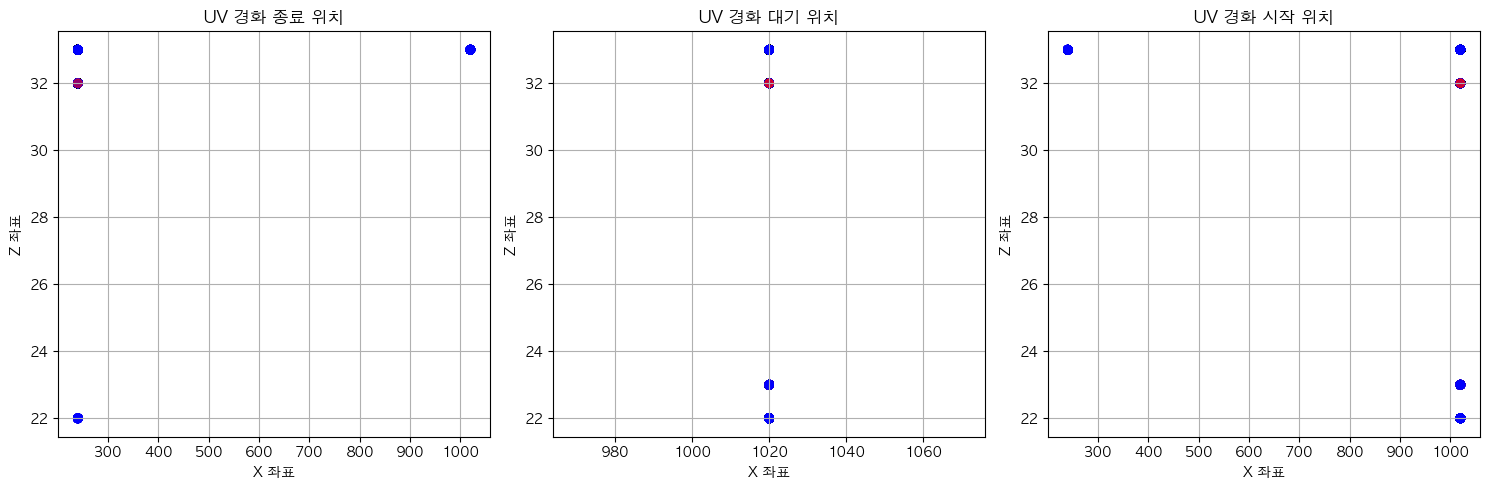

In [44]:
### UV 경화 위치에 따른 타깃값 시각화 - 2D

# 그래프 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 타깃값 색상 지정
color_map = {'AbNormal': 'red', 'Normal': 'blue'}
train['color'] = train['target'].map(color_map)

colors = train['color']

## UV 경화 종료 위치
axs[0].scatter(train['CURE END POSITION X Collect Result_Fill2'], 
               train['CURE END POSITION Z Collect Result_Fill2'], 
               c=colors, alpha=0.5)
axs[0].set_title('UV 경화 종료 위치')
axs[0].set_xlabel('X 좌표')
axs[0].set_ylabel('Z 좌표')
axs[0].grid(True)

## UV 경화 대기 위치
axs[1].scatter(train['CURE STANDBY POSITION X Collect Result_Fill2'], 
               train['CURE STANDBY POSITION Z Collect Result_Fill2'], 
               c=colors, alpha=0.5)
axs[1].set_title('UV 경화 대기 위치')
axs[1].set_xlabel('X 좌표')
axs[1].set_ylabel('Z 좌표')
axs[1].grid(True)

## UV 경화 시작 위치
axs[2].scatter(train['CURE START POSITION X Collect Result_Fill2'], 
               train['CURE START POSITION Z Collect Result_Fill2'], 
               c=colors, alpha=0.5)
axs[2].set_title('UV 경화 시작 위치')
axs[2].set_xlabel('X 좌표')
axs[2].set_ylabel('Z 좌표')
axs[2].grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()

#### 노즐 청소와 관련된 변수 시각화

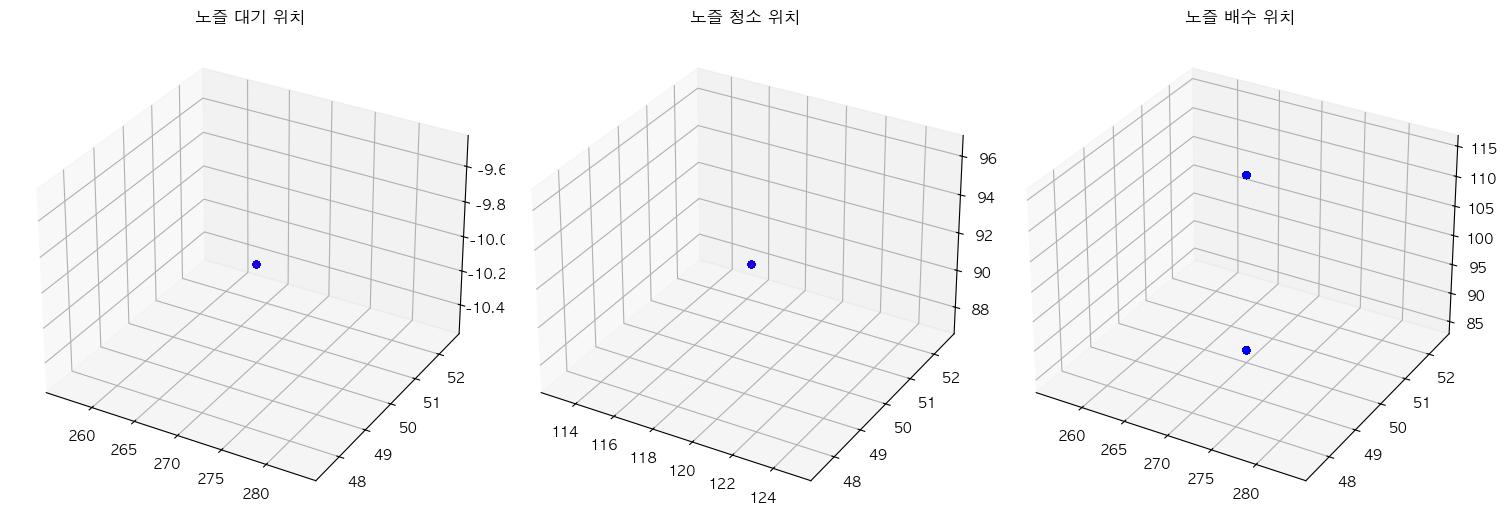

In [47]:
### 노즐 청소와 관련된 변수 시각화

# 각 stage에 대한 3D Figure 생성
fig = plt.figure(figsize=(15, 10))

# 타깃값 색상 지정
color_map = {'AbNormal': 'red', 'Normal': 'blue'}
train['color'] = train['target'].map(color_map)

colors = train['color']

## 노즐 대기 위치
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(train['HEAD Standby Position X Collect Result_Fill2'], 
            train['HEAD Standby Position Y Collect Result_Fill2'], 
            train['HEAD Standby Position Z Collect Result_Fill2'], 
            c=colors, alpha=0.5)
ax1.set_title('노즐 대기 위치')

## 노즐 청소 위치
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(train['Head Clean Position X Collect Result_Fill2'], 
            train['Head Clean Position Y Collect Result_Fill2'], 
            train['Head Clean Position Z Collect Result_Fill2'], 
            c=colors, alpha=0.5)
ax2.set_title('노즐 청소 위치')

## 노즐 배수 위치
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(train['Head Purge Position X Collect Result_Fill2'], 
            train['Head Purge Position Y Collect Result_Fill2'], 
            train['Head Purge Position Z Collect Result_Fill2'], 
            c=colors, alpha=0.5)
ax3.set_title('노즐 배수 위치')

# 그래프 표시
plt.tight_layout()
plt.show()

#### 공정 소요시간 비교

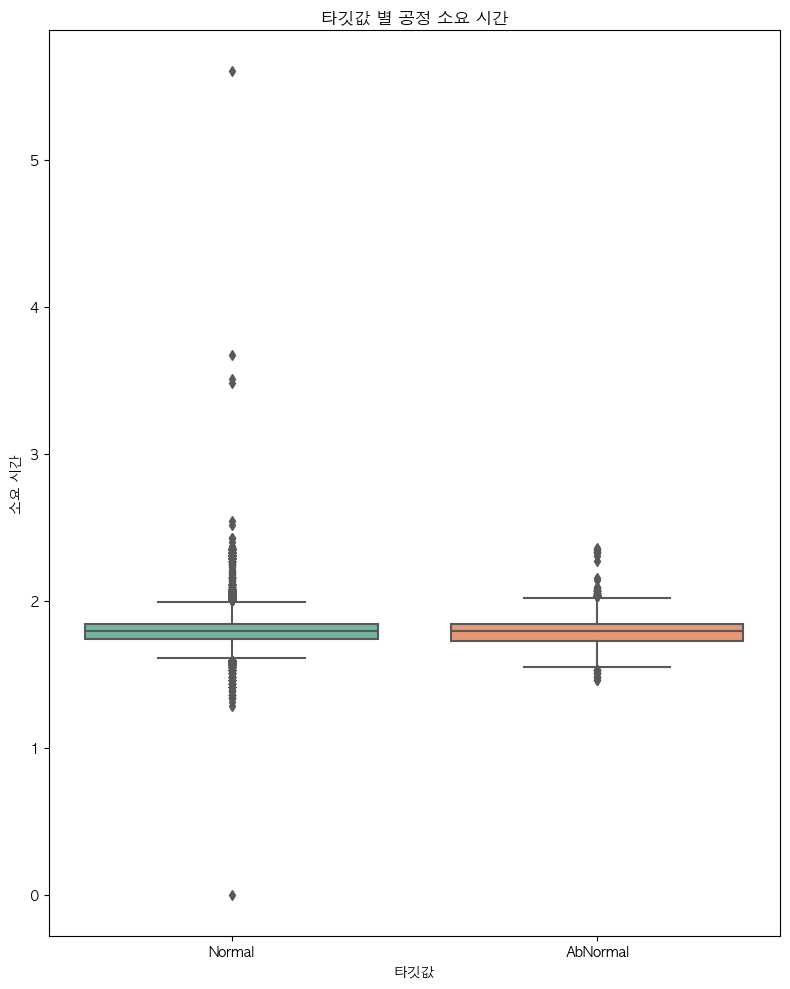

In [61]:
### 타깃값 별 fill2 dispensing 소요 시간

# 로그 변환
train['log_tact_time_fill2'] = np.log(train['Machine Tact time Collect Result_Fill2'] - train['Machine Tact time Collect Result_Fill2'].min() + 1) # 로그 변환 (0 이하 방지)

# 박스플롯 생성
plt.figure(figsize=(8, 10))
sns.boxplot(x='target', y='log_tact_time_fill2', data=train, palette="Set2")

# 그래프 제목 및 레이블 설정
plt.title('타깃값 별 공정 소요 시간')
plt.ylabel('소요 시간')
plt.xlabel('타깃값')

# 그래프 표시
plt.tight_layout()
plt.show()

#### abnormal data

In [77]:
# 타깃값이 abnormal인 데이터
abnormal_data = train[train['target'] == 'AbNormal']